In [5]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



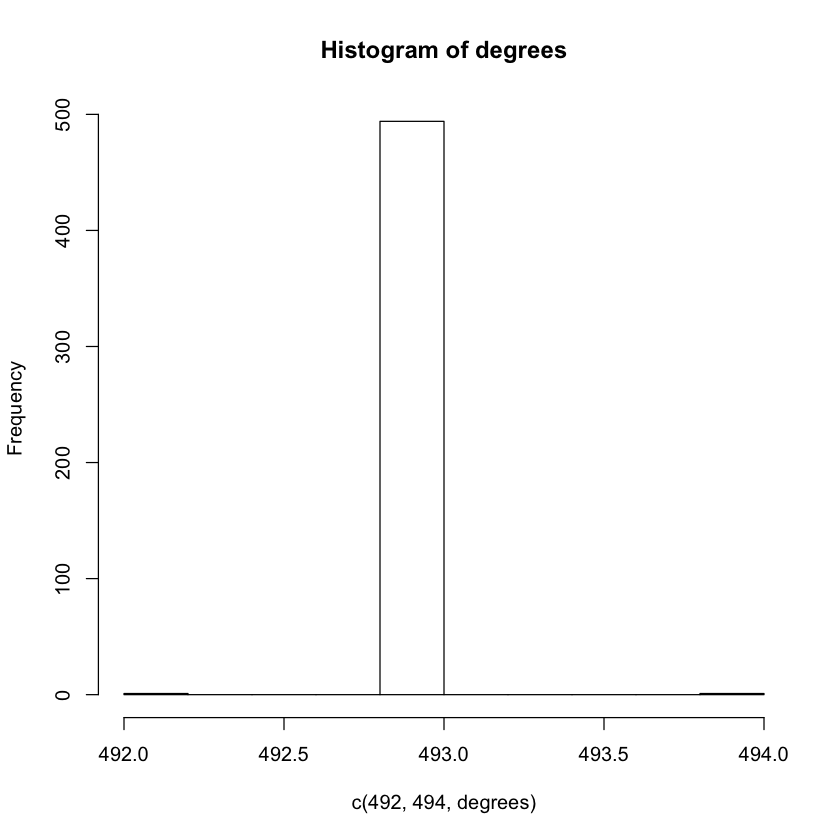

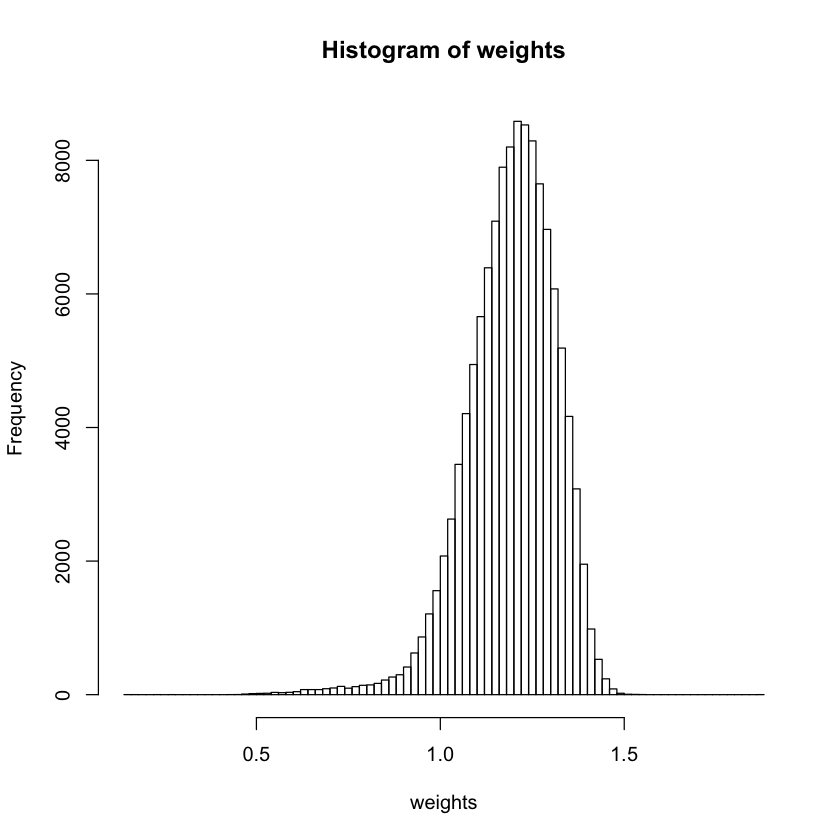

In [6]:
# problem 1.2

g = read.graph('finance_data/data/correlation.txt', format='ncol', directed=FALSE)

degrees = degree(g)
weights = E(g)$weight

hist(c(492,494,degrees), main='Histogram of degrees')
hist(weights, breaks=100, main='Histogram of weights')

In [7]:
#Problem 1.3

sectors_df = readLines('finance_data/Name_sector.csv')
sectors_df = strsplit(sectors_df, ",")
names(sectors_df) = sapply(sectors_df, "[", 1)
sectors_df = lapply(sectors_df, "[", -1)

colors = list("Health Care"="red",
              "Industrials"="green",
              "Consumer Discretionary"="blue",
              "Information Technology"="yellow",
              "Consumer Staples"="orange",
              "Utilities"="purple",
              "Financials"="blueviolet",
              "Real Estate"="gold",
              "Materials"="deeppink",
              "Energy"="chartreuse",
              "Telecommunication Services"="azure")

sectors = unlist(sectors_df[V(g)$name])
V(g)$color = unlist(colors[sectors])

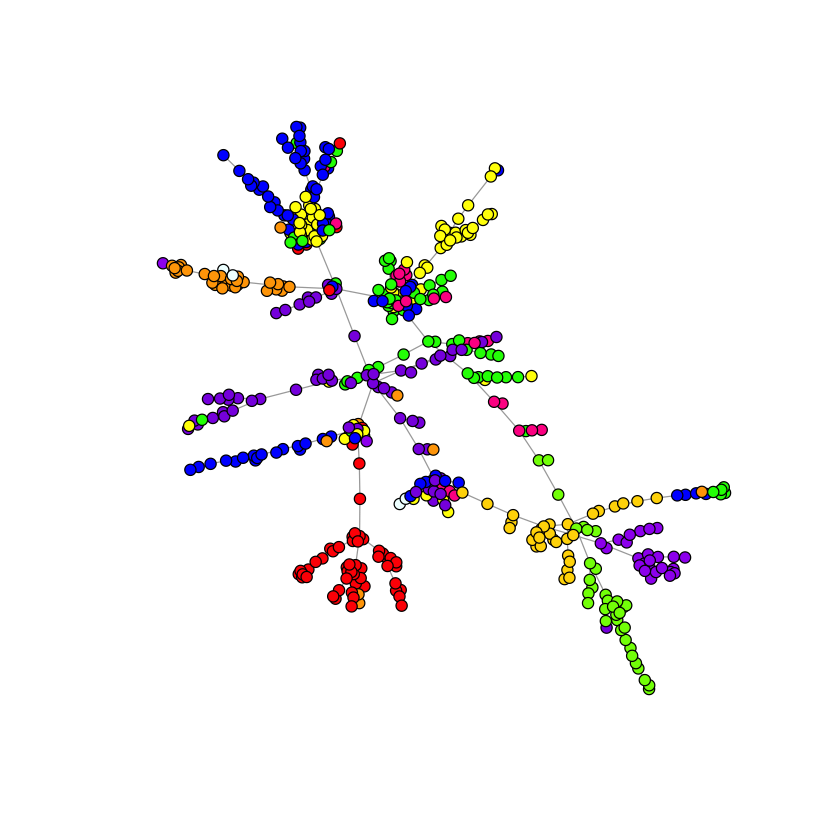

In [8]:
mst = minimum.spanning.tree(g, weights=weights)
plot(mst, vertex.size=4, vertex.label=NA)

In [9]:
#problem 1.4

s = list("Health Care"=0,
         "Industrials"=0,
         "Consumer Discretionary"=0,
         "Information Technology"=0,
         "Consumer Staples"=0,
         "Utilities"=0,
         "Financials"=0,
         "Real Estate"=0,
         "Materials"=0,
         "Energy"=0,
         "Telecommunication Services"=0)

# add number of sector in sectors for method 2
for (sector in sectors){
    s[[sector]] = s[[sector]] + 1
}

method_1 = c()
method_2 = c()
V = length(V(g))

for(node_id in V(g)){
    q_i = 0
    n_i = 0
    sector = sectors_df[[node_id]]
    for (n in neighbors(g, node_id)){
        if (sectors_df[[n]] == sector){
            q_i = q_i + 1
        }
        n_i = n_i + 1
    }
  method_1 = c(method_1, q_i / n_i)
  method_2 = c(method_2, s[[sector]] / V)
}
alpha_1 = sum(method_1) / V
alpha_2 = sum(method_2) / V


In [10]:
print(alpha_1)
print(alpha_2)

[1] 0.1120217
[1] 0.1139709


In [11]:
#Problem 1.5

g_monday = read.graph('finance_data/data/correlation_monday.txt', format='ncol', directed=FALSE)
weights_monday = E(g_monday)$weight

sectors_monday = unlist(sectors_df[V(g_monday)$name])
V(g_monday)$color = unlist(colors[sectors_monday])

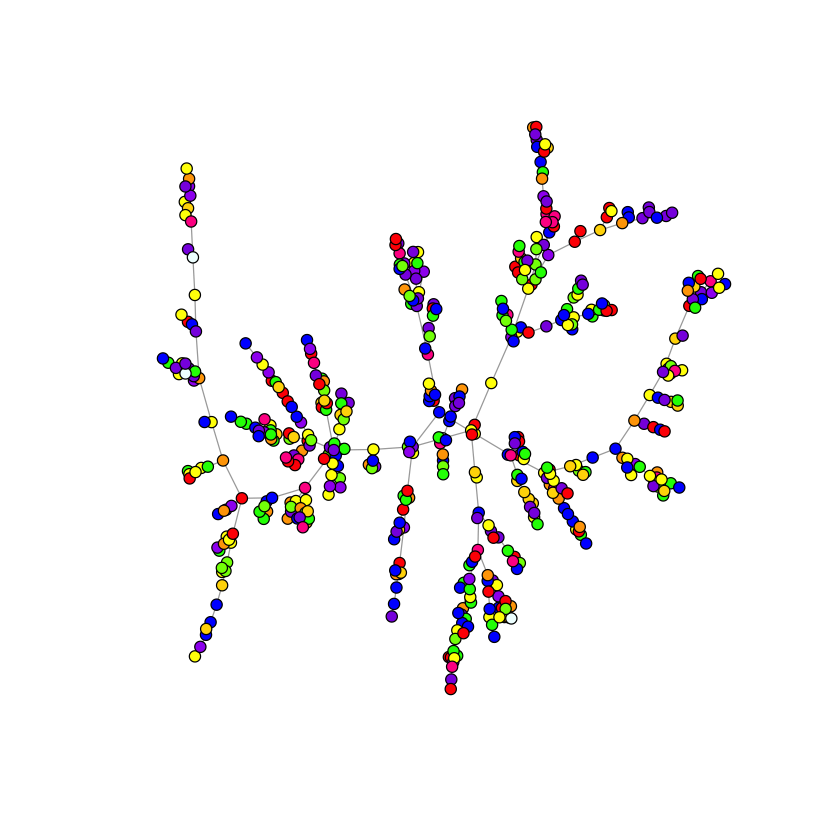

In [12]:
mst_monday = minimum.spanning.tree(g_monday, weights=weights_monday)
plot(mst_monday, vertex.size=4, vertex.label=NA)